# 機器學習_分類_決策樹-隨機森林 (Random forest)應用於貸款預測
#### 資料來源 參考文件
https://blog.csdn.net/c406495762/article/details/75663451

https://github.com/Jack-Cherish/Machine-Learning/tree/master/Decision%20Tree

https://ithelp.ithome.com.tw/articles/10271143?sc=hot

https://tree.rocks/decision-tree-graphviz-contour-with-pandas-gen-train-test-dataset-for-beginner-9137b7c8416a

https://www.jiqizhixin.com/articles/2020-06-11-6

https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

https://ithelp.ithome.com.tw/articles/10271143

https://ithelp.ithome.com.tw/articles/10272586

### 隨機森林其實是進階版的決策樹，所謂的森林就是由很多棵決策樹所組成。
### 隨機森林是由多棵不同的決策樹所組成，讓預測結果比較不容易過度擬合，並提升預測能力。
## 隨機森林的生成方法
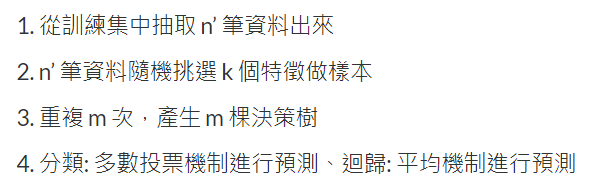

## 隨機森林的優點
### 每棵樹會用到哪些訓練資料及特徵都是由隨機決定
### 採用多個決策樹的投票機制來改善決策樹
### 與決策樹相比，不容易過度擬合
### 隨機森林每一棵樹都是獨立的
### 訓練或是預測的階段每一棵樹都能平行化的運行

## 實作Sklearn 的隨機森林套件 RandomForestClassifier,以貸款預測做範例
### Parameters:
#### n_estimators: 森林中樹木的數量，預設=100。
#### max_features: 劃分時考慮的最大特徵數，預設auto。
#### criterion: 亂度的評估標準，gini/entropy。預設為gini。
#### max_depth: 樹的最大深度。
#### splitter: 特徵劃分點選擇標準，best/random。預設為best。
#### random_state: 亂數種子，確保每次訓練結果都一樣，splitter=random 才有用。
#### min_samples_split: 至少有多少資料才能再分
#### min_samples_leaf: 分完至少有多少資料節點才能再分

### Attributes:
#### feature_importances_: 查詢模型特徵的重要程度。

### Methods:
#### fit: 放入X、y進行模型擬合。
#### predict: 預測並回傳預測類別。
#### score: 預測成功的比例。
#### predict_proba: 預測每個類別的機率值。
#### get_depth: 取得樹的深度。

### 以下為程式碼使用範例說明
from sklearn.ensemble import RandomForestClassifier
#### 建立 Random Forest Classifier 模型
randomForestModel = RandomForestClassifier(n_estimators=100, criterion = 'gini')
#### 使用訓練資料訓練模型
randomForestModel.fit(X_train, y_train)
#### 使用訓練資料預測分類
predicted = randomForestModel.predict(X_train)

## STEP0: 前置作業:收集數據及準備數據集，收集完的數據，我們要進行整理
### 原始資料集
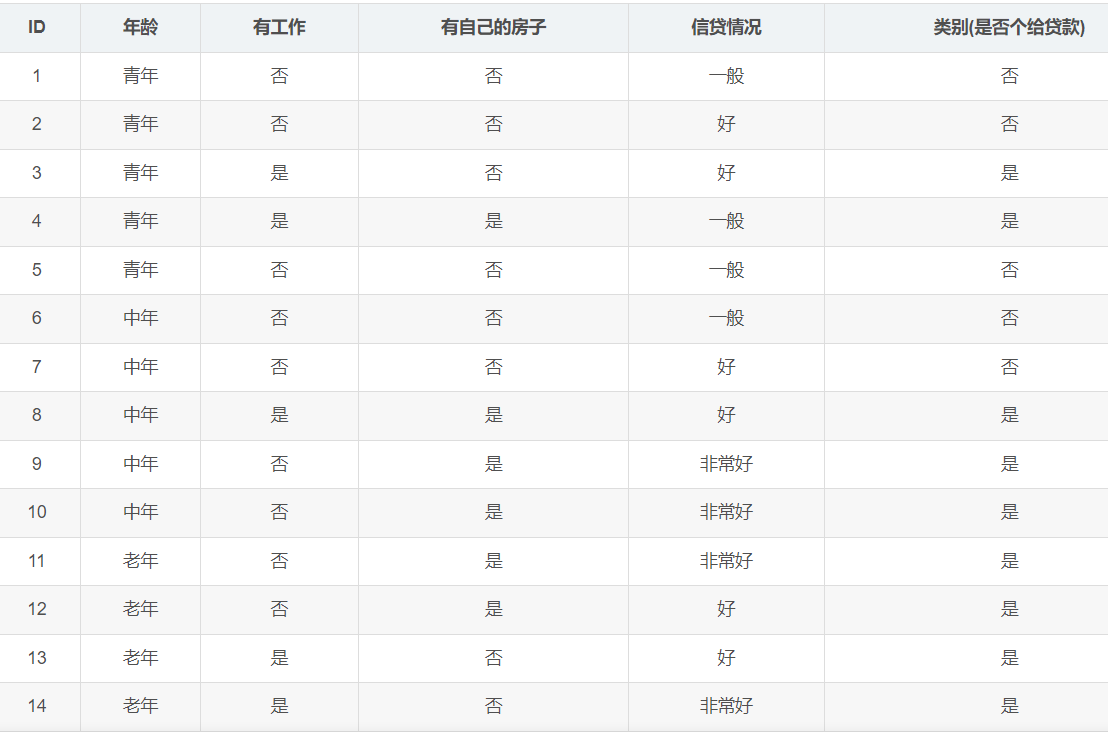

### 準備數據:準備特徵資料及整理資料
### 為方便後續程式處理,先對數據集的資料內容進行數值化標註轉換。
#### 年齡：用 0 代表青年，1 代表中年，2 代表老年；
#### 有工作：用 0 代表否，1 代表是；
#### 有自己的房子：用 0 代表否，1 代表是；
#### 信貸情況：0 代表一般，1 代表好，2 代表非常好；
#### 類別(是否給貸款)：no :0 代表否，yes:1  代表是。


### STEP1 標註資料及建立資料集
#### 直接使用Python的numpy array建構資料集。
#### 建立一個是否貸款類別及對應的特徵資料集

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

C:\Users\takming\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
##### 年齡：用 0 代表青年，1 代表中年，2 代表老年；
#### 有工作：用 0 代表否，1 代表是；
#### 有自己的房子：用 0 代表否，1 代表是；
#### 信貸情況：0 代表一般，1 代表好，2 代表非常好；
loan_data_X =np.array( [[0, 0, 0, 0],						#数据集
			[0, 0, 0, 1],
			[0, 1, 0, 1],
			[0, 1, 1, 0],
			[0, 0, 0, 0],
			[1, 0, 0, 0],
			[1, 0, 0, 1],
			[1, 1, 1, 1],
			[1, 0, 1, 2],
			[1, 0, 1, 2],
			[2, 0, 1, 2],
			[2, 0, 1, 1],
			[2, 1, 0, 1],
			[2, 1, 0, 2],
			[2, 0, 0, 0]])
#
#### 是否放貸款: 0:不放貸,1:放貸
loan_type_y =np.array([0,0,1,1,0,0,0,1,1,1,1,1,1,1,0])
print(loan_data_X.shape,loan_type_y.shape)

(15, 4) (15,)


### STEP2 切割訓練集與測試集

In [11]:
# 使用Scikit-Learn 的 train_test_split() 這個函式來做資料分割
from sklearn.model_selection import train_test_split
#train_test_split(『原始的資料』、『random_state』、『比例』)
#參數
#原始的資料：是我們打算切成 Training data 以及 Test data 的原始資料
#random_state： 亂數種子，可以固定我們切割資料的結果
#比例：可以設定 train_size 或 test_size，只要設定一邊即可，範圍在 [0-1] 之間
X_train, X_test, y_train, y_test = train_test_split(loan_data_X, loan_type_y, test_size=0.2)
print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (12, 4)
test shape: (3, 4)


### STEP3 建構隨機森林模型

In [32]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators=3,criterion = 'entropy')

### STEP4 訓練模型

In [33]:
dt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### STEP5 使用Score,F1-Score評估模型

In [34]:
#使用Score評估模型
# 預測成功的比例
print('訓練集: ',dt.score(X_train,y_train))
print('測試集: ',dt.score(X_test,y_test))

訓練集:  1.0
測試集:  1.0


In [35]:
#使用F1-Score評估模型
from sklearn.metrics import f1_score
# 預測成功的比例
dt_pred_train = dt.predict(X_train)
print('訓練集 Evaluation F1-Score=>',f1_score(y_train,dt_pred_train))
dt_pred_test = dt.predict(X_test)
print('測試集 Evaluation F1-Score=>',f1_score(y_test,dt_pred_test))

訓練集 Evaluation F1-Score=> 1.0
測試集 Evaluation F1-Score=> 1.0


### STEP6 進行預測

In [36]:
# 使用predict預測分類
##### 年齡：用 0 代表青年，1 代表中年，2 代表老年；
#### 有工作：用 0 代表否，1 代表是；
#### 有自己的房子：用 0 代表否，1 代表是；
#### 信貸情況：0 代表一般，1 代表好，2 代表非常好；
new_x =np.array([[2,0,0,0]])
predicted =dt.predict(new_x)
print(predicted)
if(predicted[0]==1):
    print("放貸")
elif(predicted[0]==0):
    print("不放貸")

[0]
不放貸
